In [15]:
# Import modules
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')

# Set seed for reproducibility
np.random.seed(5)

# Read in IMDb and Wikipedia movie data (both in same file)
movies_df = pd.read_csv('datasets/movies.csv')

print("Number of movies loaded: %s " % (len(movies_df)))

# Display the data
movies_df

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/suheylgurbuz/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of movies loaded: 100 


rank                                              title  \
0      0                                      The Godfather   
1      1                           The Shawshank Redemption   
2      2                                   Schindler's List   
3      3                                        Raging Bull   
4      4                                         Casablanca   
5      5                    One Flew Over the Cuckoo's Nest   
6      6                                 Gone with the Wind   
7      7                                       Citizen Kane   
8      8                                   The Wizard of Oz   
9      9                                            Titanic   
10    10                                 Lawrence of Arabia   
11    11                             The Godfather: Part II   
12    12                                             Psycho   
13    13                                       Sunset Blvd.   
14    14                                            Vertigo   
15    15                                  On the Waterfront   
16    16                                       Forrest Gump   
17    17                                 The Sound of Music   
18    18                                    West Side Story   
19    19                                          Star Wars   
20    20                         E.T. the Extra-Terrestrial   
21    21                              2001: A Space Odyssey   
22    22                           The Silence of the Lambs   
23    23                                          Chinatown   
24    24                       The Bridge on the River Kwai   
25    25                                Singin' in the Rain   
26    26                              It's a Wonderful Life   
27    27                                   Some Like It Hot   
28    28                                       12 Angry Men   
29    29  Dr. Strangelove or: How I Learned to Stop Worr...   
..   ...                                                ...   
70    70                                           Rain Man   
71    71                                         Annie Hall   
72    72                                      Out of Africa   
73    73                                  Good Will Hunting   
74    74                                Terms of Endearment   
75    75                                            Tootsie   
76    76                                              Fargo   
77    77                                              Giant   
78    78                                The Grapes of Wrath   
79    79                                              Shane   
80    80                                     The Green Mile   
81    81                 Close Encounters of the Third Kind   
82    82                                            Network   
83    83                                          Nashville   
84    84                                       The Graduate   
85    85                                  American Graffiti   
86    86                                       Pulp Fiction   
87    87                                  The African Queen   
88    88                                         Stagecoach   
89    89                               Mutiny on the Bounty   
90    90                                 The Maltese Falcon   
91    91                                 A Clockwork Orange   
92    92                                        Taxi Driver   
93    93                                  Wuthering Heights   
94    94                                   Double Indemnity   
95    95                              Rebel Without a Cause   
96    96                                        Rear Window   
97    97                                      The Third Man   
98    98                                 North by Northwest   
99    99                                Yankee Doodle Dandy   

                                                genre  \
0                              [u' Crime

In [16]:
# Combine wiki_plot and imdb_plot into a single column
movies_df['plot'] = movies_df['wiki_plot'].astype(str) + "\n" + \
                 movies_df['imdb_plot'].astype(str)

# Inspect the new DataFrame
movies_df.head()

rank                     title                                    genre  \
0     0             The Godfather                   [u' Crime', u' Drama']   
1     1  The Shawshank Redemption                   [u' Crime', u' Drama']   
2     2          Schindler's List  [u' Biography', u' Drama', u' History']   
3     3               Raging Bull    [u' Biography', u' Drama', u' Sport']   
4     4                Casablanca        [u' Drama', u' Romance', u' War']   

                                           wiki_plot  \
0  On the day of his only daughter's wedding, Vit...   
1  In 1947, banker Andy Dufresne is convicted of ...   
2  In 1939, the Germans move Polish Jews into the...   
3  In a brief scene in 1964, an aging, overweight...   
4  It is early December 1941. American expatriate...   

                                           imdb_plot  \
0  In late summer 1945, guests are gathered for t...   
1  In 1947, Andy Dufresne (Tim Robbins), a banker...   
2  The relocation of Polish Jews from surrounding...   
3  The film opens in 1964, where an older and fat...   
4  In the early years of World War II, December 1...   

                                                plot  
0  On the day of his only daughter's wedding, Vit...  
1  In 1947, banker Andy Dufresne is convicted of ...  
2  In 1939, the Germans move Polish Jews into the...  
3  In a brief scene in 1964, an aging, overweight...  
4  It is early December 1941. American expatriate...

In [17]:
# Tokenize a paragraph into sentences and store in sent_tokenized
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                        Today (May 19, 2016) is his only daughter's wedding. 
                        Vito Corleone is the Godfather.
                        """)]

# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

# Remove tokens that do not contain any letters from words_tokenized
import re

filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

# Display filtered words to observe words after tokenization
filtered

['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

In [18]:
# Import the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer

# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

# Print filtered to observe words without stemming
print("Without stemming: ", filtered)

# Stem the words from filtered and store in stemmed_words
stemmed_words = [stemmer.stem(word) for word in filtered]

# Print the stemmed_words to observe words after stemming
print("After stemming:   ", stemmed_words)

Without stemming:  ['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']
After stemming:    ['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


In [19]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    
    # Tokenize by sentence, then by word
    tokens = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence)]
    
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    
    # Stem the filtered_tokens
    stems = [stemmer.stem(token) for token in filtered_tokens]
    
    return stems

words_stemmed = tokenize_and_stem("Today (May 19, 2016) is his only daughter's wedding.")
print(words_stemmed)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


In [20]:
# Import TfidfVectorizer to create TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))

In [21]:
# Fit and transform the tfidf_vectorizer with the "plot" of each movie
# to create a vector representation of the plot summaries
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in movies_df["plot"]])

print(tfidf_matrix.shape)

/Users/suheylgurbuz/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(100, 564)


In [26]:
# Import k-means to perform clusters
from sklearn.cluster import KMeans

# Create a KMeans object with 5 clusters and save as km
km = KMeans(n_clusters=5)

# Fit the k-means object with tfidf_matrix
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

# Create a column cluster to denote the generated cluster for each movie
movies_df["cluster"] = clusters

# Display number of films per cluster (clusters from 0 to 4)
movies_df['cluster'].value_counts() 

2    35
1    21
3    20
0    17
4     7
Name: cluster, dtype: int64

In [27]:
# Import cosine_similarity to calculate similarity of movie plots
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)

In [28]:
# Import matplotlib.pyplot for plotting graphs
import matplotlib.pyplot as plt

# Configure matplotlib to display the output inline
%matplotlib inline

# Import modules necessary to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

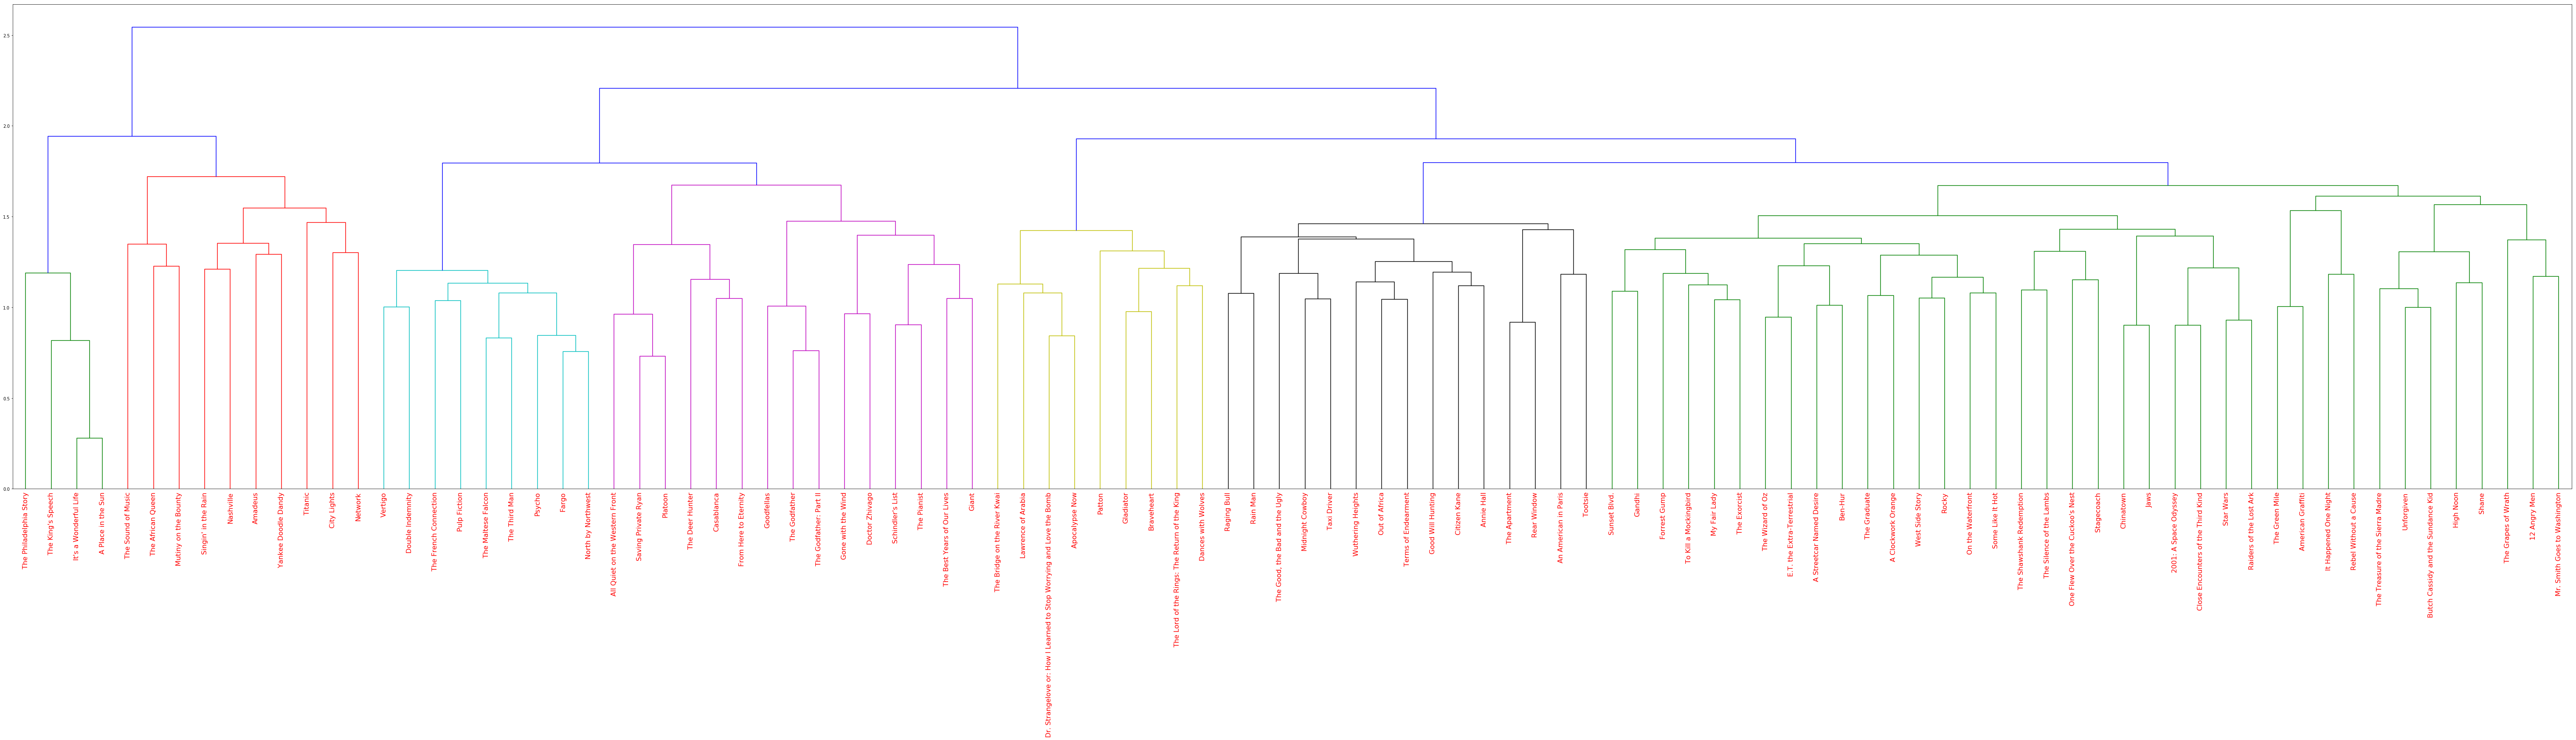

In [29]:
# Create mergings matrix 
mergings = linkage(similarity_distance, method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
               labels=[x for x in movies_df["title"]],
               leaf_rotation=90,
               leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()

In [30]:
# Answer the question 
ans = "Gladiator"
print(ans)

Gladiator
